## Regression

In this section, we will try to solve the problem of Regression. In our first step, we will atack the problem from the analytical view.

### Generate Synthetic Data

We will use rather simple line of $ y = 3x + 8 $ with noise of $ \epsilon = 5 $ to generate test and train data:

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def generate_data(n=50, noise=5.0):
    np.random.seed(42)
    X=np.linspace(-10,10,n)
    true_slop=3
    true_intercept=8
    noise = np.random.randn(n)*noise
    y= true_slop * X + true_intercept + noise
    return X,y
    

## Generate and plot data point

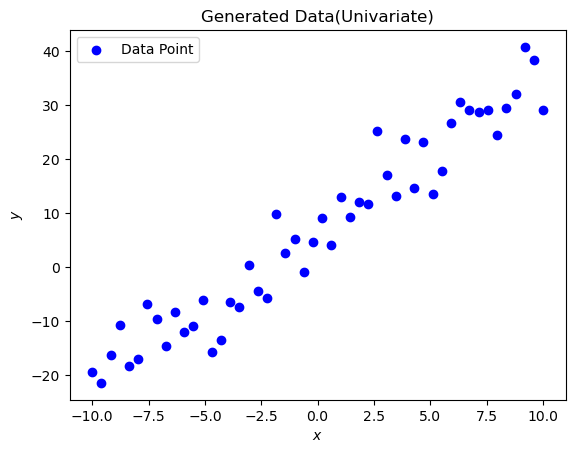

In [18]:
X, y = generate_data(n=50,noise=5.0)
plt.scatter(X,y,color="blue", label= "Data Point")
plt.title("Generated Data(Univariate)")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

## Linear Regression: Analytical Solution
# Implement the Closed-Form Solution

In [21]:
# Hypothesis:h_w(x) = w_0 + w_1 * x_1
def h_w(x,w):
    return w[0] + w[1] * x                      # equivalent to w_0 + w_1 * x
# Liner Regression using closed-form solution
def liner_regression_closed_form(X,y):
#Adding bias term (x_0 = 1) to input vector X
    X_b = np.c_[np.ones((len(X),1)),X]          # X_b is now the full input vector with bias term
                                                # Closed-form solution: w = (X^T * X)^-1 * X^T *y
    w = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return w
# Get parameter vector w
w = liner_regression_closed_form (X,y)
print(f"Parameter (w):")
print(f"w_1 = {w[1]:.2f}, w_0 = {w[0]:.2f}")


Parameter (w):
w_1 = 2.86, w_0 = 6.87


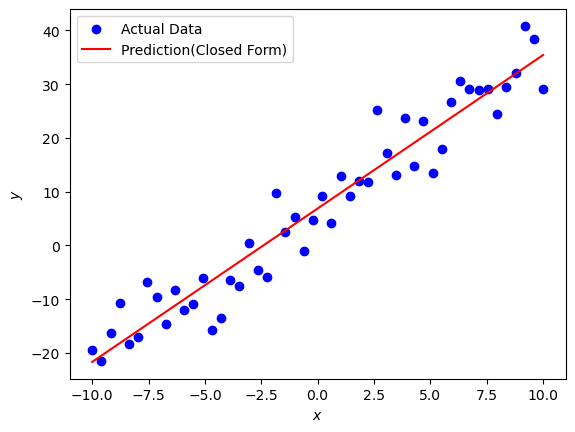

In [23]:
y_perd = h_w(X,w)
plt.scatter(X,y,color = 'blue',label='Actual Data')
plt.plot(X, y_perd, color='red',label = 'Prediction(Closed Form)')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

## Polynomial Regression: Analytical Solution
Linear regression can be extended to model nonlinear relationships by introducing polynomial terms.

# Engineering Polynomial Features

In [27]:
#Function to generate polynomial features (input matrix X')
def polynomial_features(X,degree):
    X_poly = np.c_[np.ones(len(X))]
    for i in range (1, degree+1):
        X_poly = np.c_[X_poly , X**i]
    return X_poly

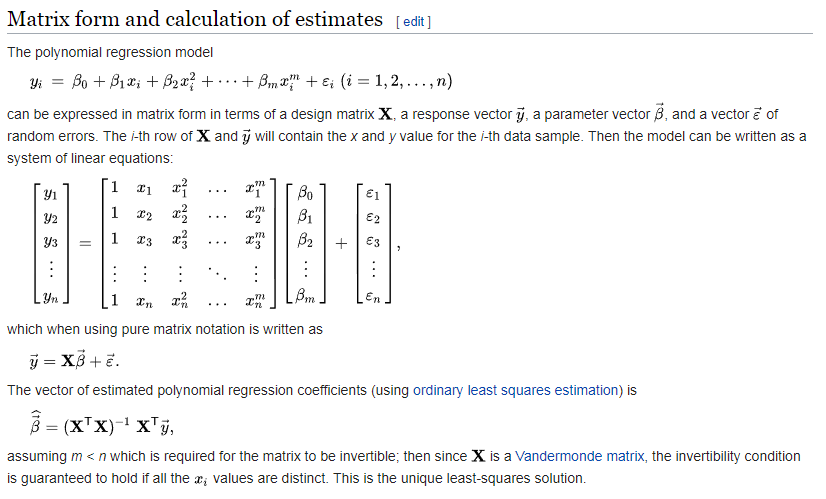

 مثال کاربردی: اتوبوس و قطار

گروهی از افراد به یک مسافرت با اتوبوس رفتند.
که هر کودک 3 دلار و از هر بزرگسال 3.20 دلار به عوان هزینه بلیت دریافت شد.
مجموع هزینه‌های بلیت‌ها برابر با  118.40 دلار شد.
در مسیر برگشت، به جای اتوبوس از قطار استفاده شد 
و از هر کودک 3.50 دلار و از هر بزرگسال 3.60 دلار اخذ گردید 
و این بار مجموع هزینه بیلیت‌ها 135.20 دلار شد.
اینک باید محاسبه کنید، چه تعداد کودک و چه تعداد بزرگسال داریم؟


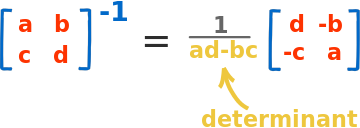

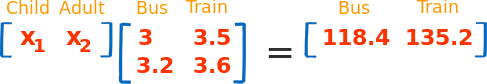

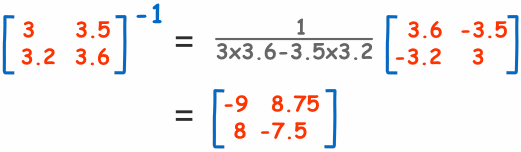

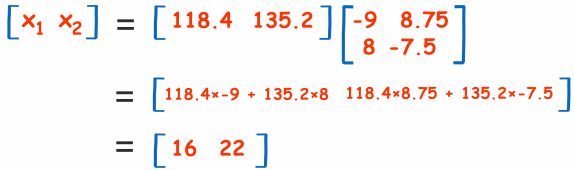

In [35]:
def polynomial_regression(X,y,degree):
    X_poly = polynomial_features(X,degree)
    #Closed-form solution: w = (X'^T * X')^-1 * X'^T * y
    w = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y)    #compute the invers of a matrix 
    return w
m = 5 #Degree of the polynomial regression
w_poly = polynomial_regression (X,y,m) #Parameter vector w 
print (f"Parameters (w) for Degree {m}:{w_poly}")

Parameters (w) for Degree 5:[ 5.88112811e+00  3.55957762e+00  3.28108945e-02 -2.15493734e-02
 -6.78082560e-05  1.38175494e-04]


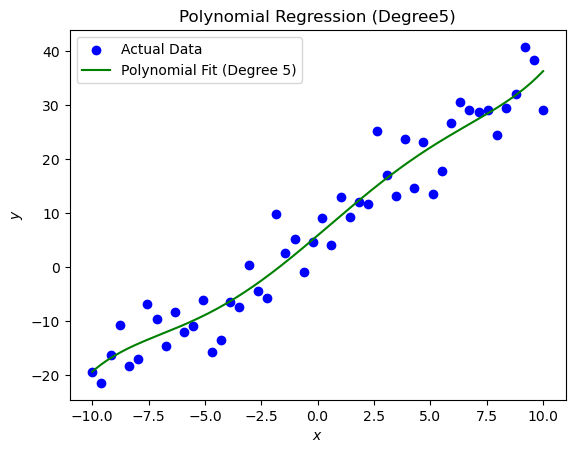

In [37]:
X_fit = np.linspace (X.min(),X.max(), 200)
X_fit_poly = polynomial_features(X_fit, m)
y_poly_pred = X_fit_poly.dot(w_poly)    # h_w(x) = X' * w
# Plot the actual data and the polynomial fit 
plt.scatter(X, y, color = 'blue', label = 'Actual Data')
plt.plot(X_fit, y_poly_pred, color = 'green' ,label = f'Polynomial Fit (Degree {m})')
plt.title(f"Polynomial Regression (Degree{m})")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

In [39]:
def compute_rms_error(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

Degree 0: Train RMSE = 17.58 , Test RMSE = 16.98


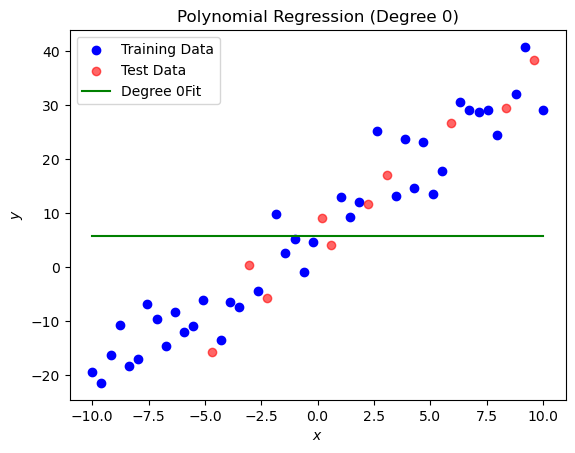

Degree 1: Train RMSE = 4.58 , Test RMSE = 4.49


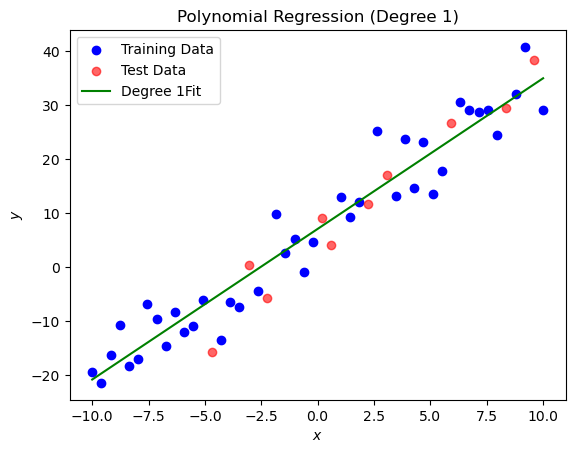

Degree 2: Train RMSE = 4.55 , Test RMSE = 4.24


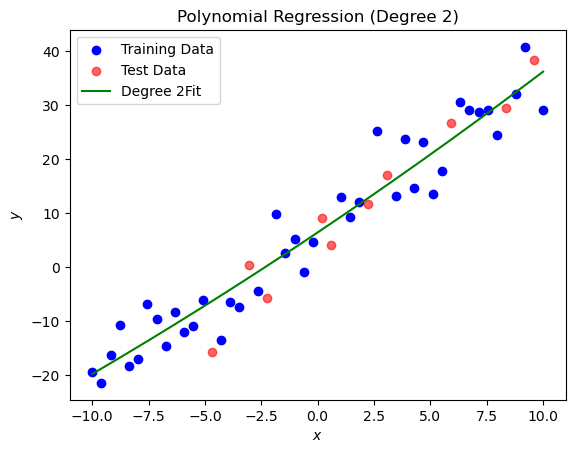

Degree 3: Train RMSE = 4.47 , Test RMSE = 4.12


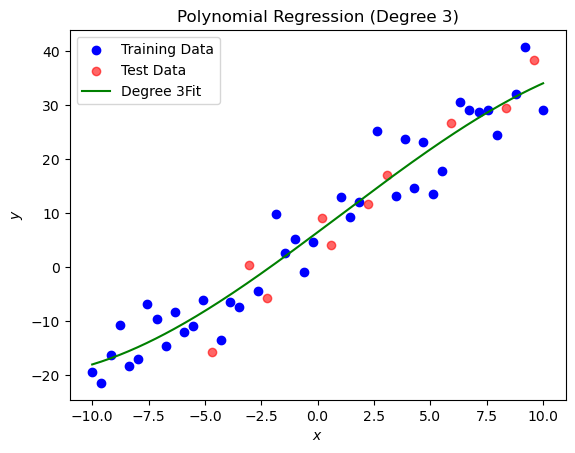

Degree 4: Train RMSE = 4.47 , Test RMSE = 4.14


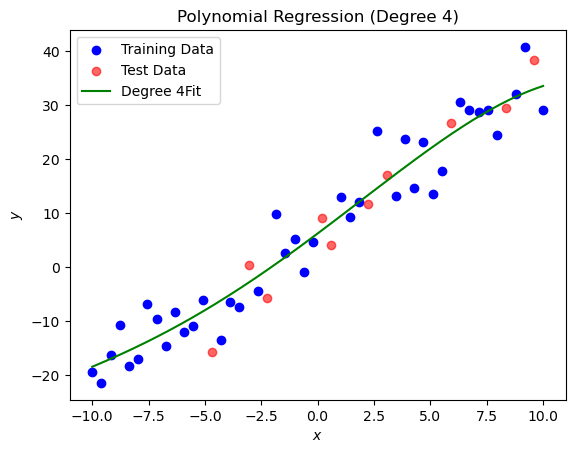

Degree 5: Train RMSE = 4.44 , Test RMSE = 4.03


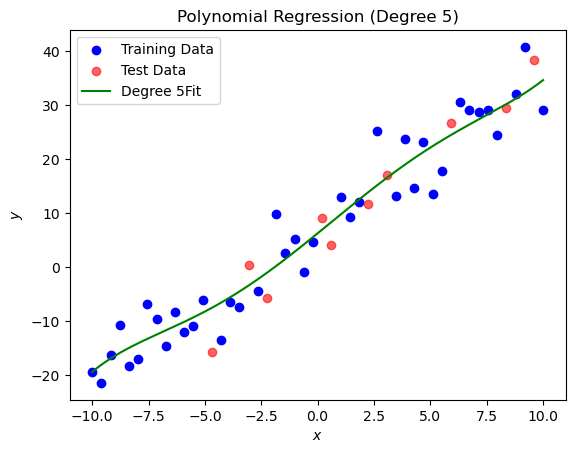

Degree 6: Train RMSE = 4.26 , Test RMSE = 4.15


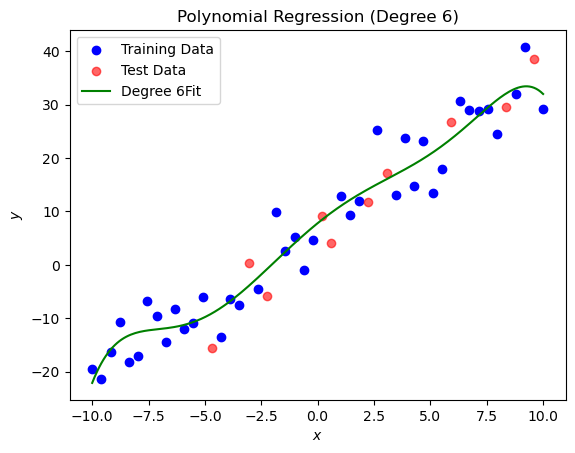

Degree 7: Train RMSE = 4.20 , Test RMSE = 4.39


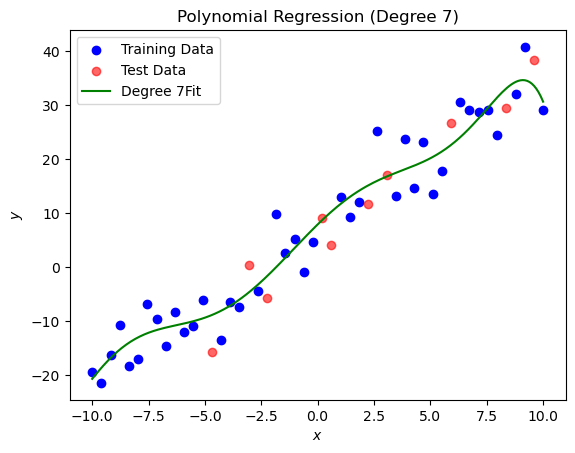

Degree 8: Train RMSE = 4.20 , Test RMSE = 4.39


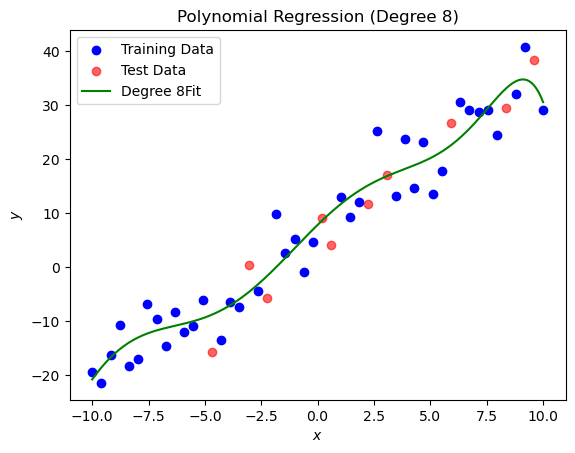

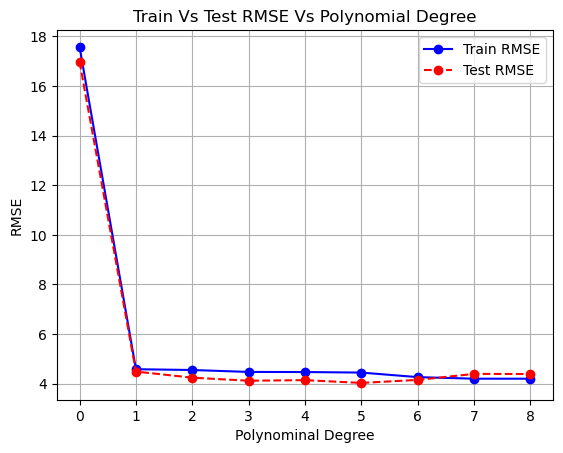

In [41]:
from sklearn.model_selection import train_test_split
# split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.2, random_state=42)
degrees = range (0,9)
train_rms_errors= []
test_rms_errors = []
for d in degrees:
    #Train the model on the training set
    w_poly = polynomial_regression(X_train , y_train, d)
    
    # Compute predictions for the training set 
    X_train_poly = polynomial_features (X_train, d)
    y_train_pred = X_train_poly.dot(w_poly)

    # Compute prediction for the test set
    X_test_poly = polynomial_features(X_test,d)
    y_test_pred = X_test_poly.dot(w_poly)

    # Calulate RMSE for both training and test sets
    train_rms_error = compute_rms_error(y_train, y_train_pred)
    test_rms_error = compute_rms_error(y_test,y_test_pred)

    # Store the errors
    train_rms_errors.append(train_rms_error)
    test_rms_errors.append(test_rms_error)


    # Print the RMSE for the current degree
    print(f"Degree {d}: Train RMSE = {train_rms_error:.2f} , Test RMSE = {test_rms_error:.2f}")


    # Plot the polynominal fit on the data
    plt.scatter(X_train,y_train,color='blue', label = "Training Data")
    plt.scatter(X_test , y_test , color = 'red' ,label = 'Test Data', alpha= 0.6)
    X_fit = np.linspace(X.min(),X.max(),200)
    X_fit_poly= polynomial_features(X_fit,d)
    y_fit_pred = X_fit_poly.dot(w_poly)
    plt.plot(X_fit,y_fit_pred,label = f"Degree {d}Fit",color = 'green')
    plt.title(f"Polynomial Regression (Degree {d})")
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    plt.legend()
    plt.show()

# Plot RMSE for training and test sets
plt.plot(degrees,train_rms_errors,marker = "o" ,linestyle = "-", color ='blue' ,label= 'Train RMSE')
plt.plot(degrees,test_rms_errors,marker='o',linestyle= "--", color = 'red' , label= 'Test RMSE')
plt.title("Train Vs Test RMSE Vs Polynomial Degree")
plt.xlabel("Polynominal Degree")
plt.ylabel("RMSE")
plt.xticks(degrees)
plt.grid(True)
plt.legend()
plt.show()

As you can see from the RMSE plot above, by increasing the degree polynomial, the training error never increases (Why ?). However; testing error can increase.

## Gradient Descent:
In this section, we will use the popular iterative method called **Gradient Descent** to solve the regression problem.

Assuming we need to find $ w_0\ and\ w_1 $ in the problem of linear regression, update rule using gradinet descent will be:
$$
\begin{array}{l}
w_0 \leftarrow w_0 - \eta \frac{\partial J}{\partial w_0} = w_0 - \eta \sum_{i=1}^{m} (h_w(x^{(i)}) - y^{(i)}) \\
w_1 \leftarrow w_1 - \eta \frac{\partial J}{\partial w_1} = w_1 - \eta \sum_{i=1}^{m} (h_w(x^{(i)}) - y^{(i)}) (x^{(i)}) \\
\end{array}
$$

In which $ \eta $ is the learning rate. To overcome the problem of overflow, assume cost function is $ J(\mathbf{w}) = \frac{SSE}{training \ \ size} $

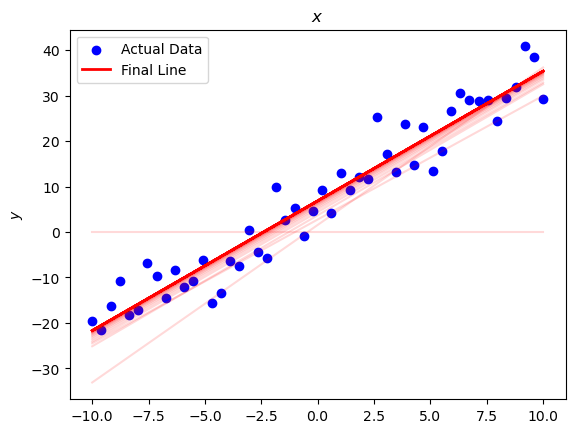

In [111]:
#SSE cost function
def cost_function(X, y, w):
    return np.sum((h_w(X,w) - y)**2 / len(X))
# Gradient descent
def gradient_descent(X, y, w, alpha, num_iters):
    m=len(X)
    cost_history = []
    w_history = [w.copy()]

    for i in range (num_iters):
        # updates
        gradient_w0 = np.sum(h_w(X,w)-y)/ m
        gradient_w1 = np.sum((h_w(X,w)-y) * X)/ m
        w[0] -= alpha * gradient_w0 
        w[1] -= alpha * gradient_w1

        cost_history.append(cost_function(X,y,w))
        w_history.append(w.copy()) #store a copy of w , not the reference 
    return w, cost_history, w_history
X, y = generate_data(n=50 , noise = 5.0)
w_initial = [0,0]
eta = 0.05
num_iters = 500 
# Run gradient Descent
w_final, cost_history, w_history = gradient_descent(X,y,w_initial,eta,num_iters)

# Visualize cost function (log of J(w))
w0_vals = np.linspace (-10,20,100)
w1_vals = np.linspace (-1,5,100)
J_vals = np.zeros((len(w0_vals), len(w1_vals)))
for i in range(len(w0_vals)):
    for j in range (len ( w1_vals)):
        w = [w0_vals[i],w1_vals[j]]
        J_vals[i,j] = cost_function(X,y,w)

plt.scatter(X,y,color = 'blue', label='Actual Data')
# Plot lines for every 50th step with increasing alpha
for idx , w in enumerate(w_history[::num_iters//100]):
    alpha= 0.15 + .085*(idx)/100 #Gradually increase alpha for each line
    plt.plot(X,h_w(X,w),color = 'red' , alpha = alpha)

# Final line in bold
plt.plot(X,h_w(X, w_final), color = 'red' , lw=2 , label = 'Final Line')
plt.title ("GD Progression - Linear Regression")
plt.title ("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()
        

As you can see from the lines above, we first started by a neutral hypothesis which was a simple line $ y = 0 $. The update at each iteration tries to minimize cost function thus improving weights. As you can see, the final line after 500 iterations is the line best describing datapoints. **But how can we be sure that cost function is optimizable ?**

### Plotting cost function
To get a better sense of SSE cost function, let's visualize it for univariate linear regression discussed:

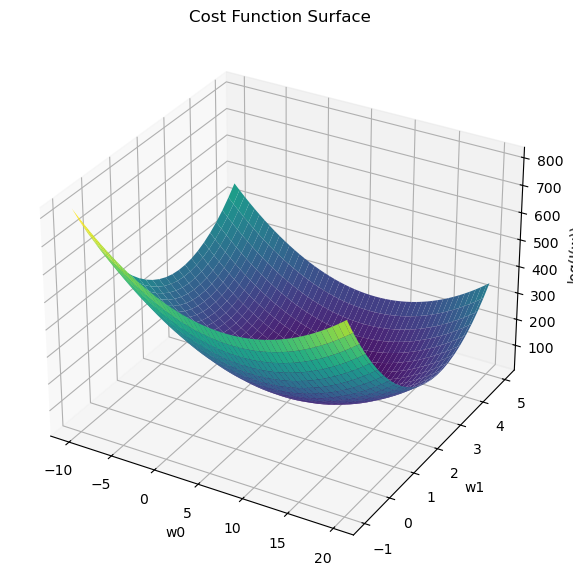

In [156]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection = '3d')
W0, W1 = np.meshgrid(w0_vals, w1_vals)
ax.plot_surface(W0 , W1, J_vals.T, cmap = 'viridis')
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('log(J(w))')
plt.title("Cost Function Surface")
plt.show()

The plot above can be somewhat confusing. Let us visualize $ log J(\mathbf{w}) $ instead:

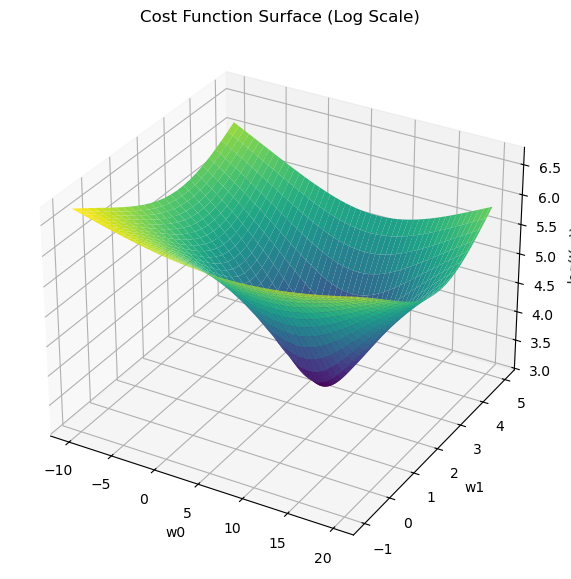

In [152]:
# 3D Plot of log J(w)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
W0, W1 = np.meshgrid(w0_vals, w1_vals)
ax.plot_surface(W0, W1, np.log(J_vals.T), cmap='viridis')
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('log(J(w))')
plt.title("Cost Function Surface (Log Scale)")
plt.show()

 Gradient descent tries to reach minimum point of the plot above in each step. But are we actually reaching our goal ? Let's visualize it:

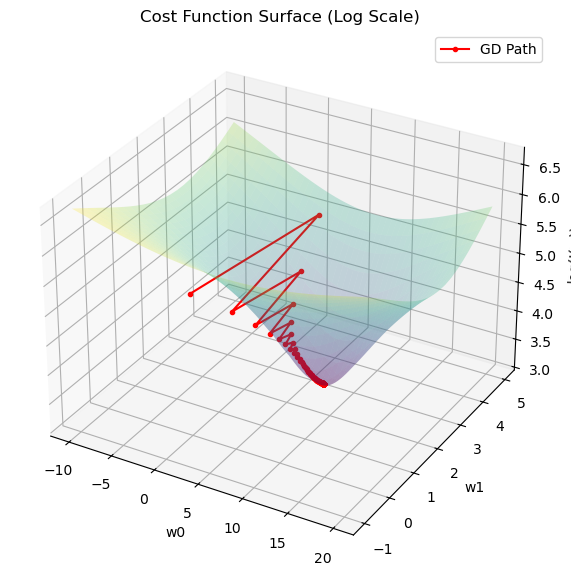

In [161]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
W0, W1 = np.meshgrid(w0_vals, w1_vals)
ax.plot_surface(W0, W1, np.log(J_vals.T), cmap='viridis', alpha=0.25)
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('log(J(w))')
plt.title("Cost Function Surface (Log Scale)")

# Plot the points on the 3D surface for each GD iteration
w_history_array = np.array(w_history)  # Convert list to array for easier slicing
w0_history = w_history_array[:, 0]
w1_history = w_history_array[:, 1]
cost_history_log = np.log(np.array(cost_history))  # Log of the cost history

# Plot the path of gradient descent in 3D
ax.plot(w0_history[:num_iters], w1_history[:num_iters], cost_history_log, marker='o', color='r', label='GD Path', markersize=3)

plt.legend()
plt.show()

As shown in the plot above, GD is trying to reach optimal point at each step.

### Effect of learning rate ($ \eta $)
Choosing $ \eta $ could be tricky. Large learning rates can lead to divergence. Small learning rates on the other hand could slow down the convergence by requiring more iterations:

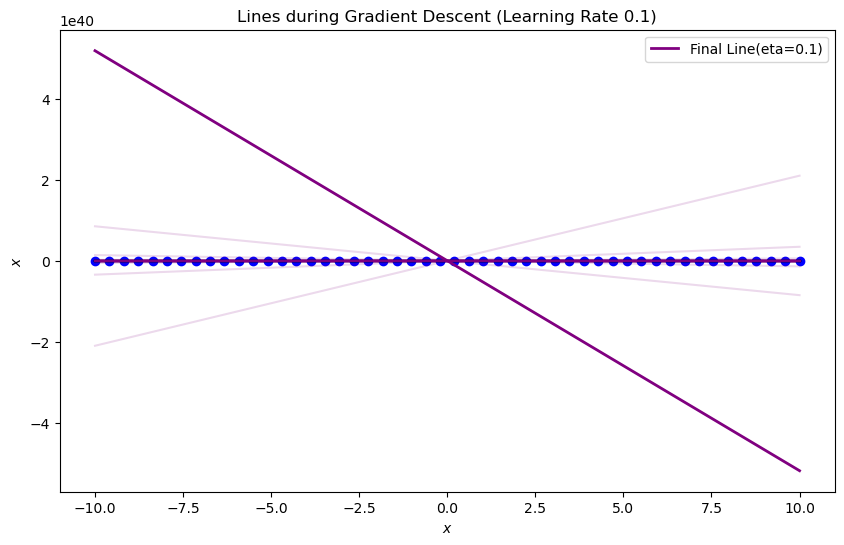

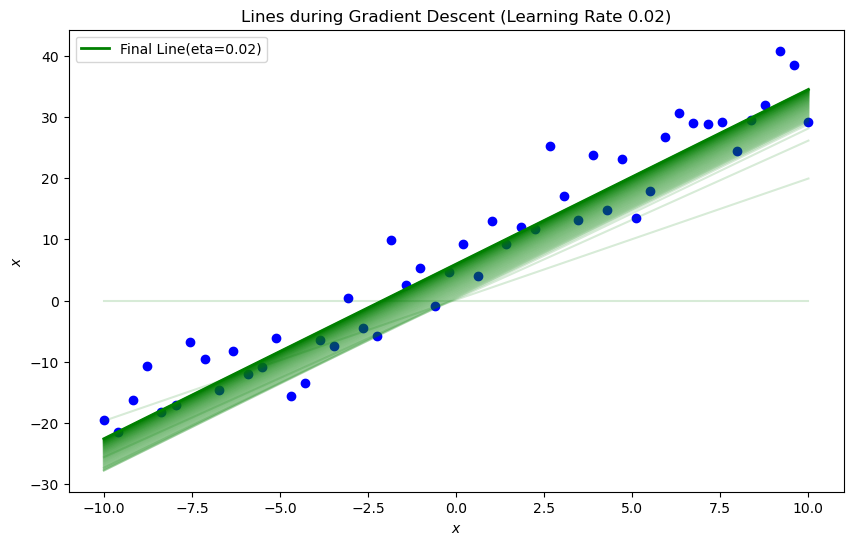

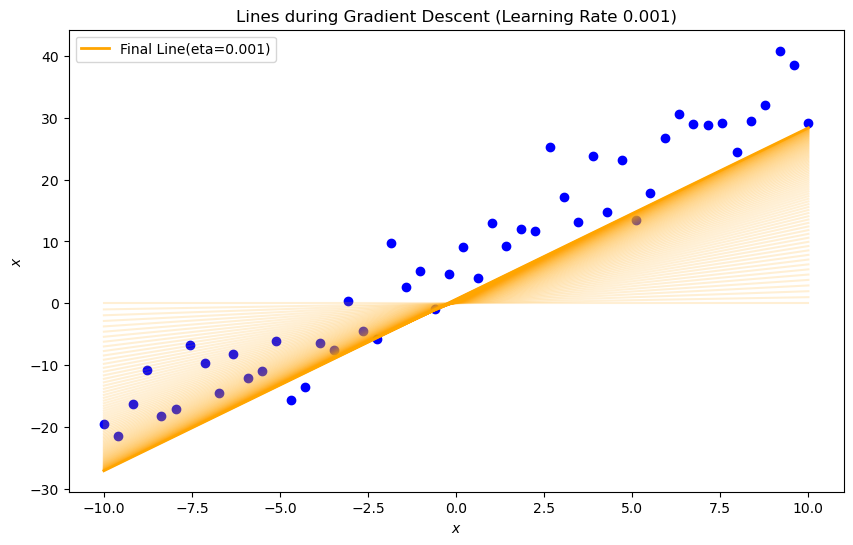

In [190]:
learning_rates = [0.1, 0.02,0.001]
num_iters = 100
w_initial = [0 , 0]
colors = ['purple', 'green', 'orange']
w0_vals = np.linspace(-10,20,100)
w1_vals = np.linspace (-1,5,100)
J_vals = np.zeros((len(w0_vals),len(w1_vals)))
for i in range (len(w0_vals)):
    for j in range(len(w1_vals)):
        w = [w0_vals[i],w1_vals[j]]
        J_vals[i,j]=cost_function(X,y,w)
cost_histories = []

for idx, eta in enumerate(learning_rates):
    w_final, cost_history, w_history = gradient_descent(X, y, w_initial.copy(), eta, num_iters)
    cost_histories.append(cost_history)

    plt.figure(figsize= (10, 6))
    for step_idx, w in enumerate(w_history[::num_iters//100]):
        alpha_val = 0.15 + .85*(idx)/100
        plt.plot(X, h_w(X,w), color = colors[idx], alpha = alpha_val)
    plt.plot(X,h_w(X, w_final), lw=2, label = f'Final Line(eta={eta})',color= colors[idx])
    plt.title(f"Lines during Gradient Descent (Learning Rate {eta})")
    plt.xlabel("$x$")
    plt.ylabel("$x$")
    plt.legend()
    plt.scatter(X, y, color= 'blue', label = 'Actual Data')
    plt.show()
        


As shown in the plots above, choosing a large learning rate leads to divergence. In this example, the update rule keeps making weights larger and larger and the weights will never converge. Choosing a small learning rate on the other hand, leads to slow convergence. In this example, learning $ w_0 $ is happening at a slow time because the update rule is being changed almost minimially !

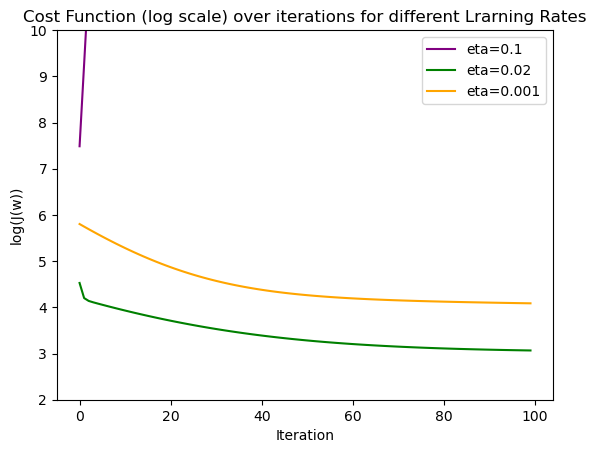

In [195]:
plt.title("Cost Function (log scale) over iterations for different Lrarning Rates")
plt.xlabel('Iteration')
plt.ylabel('log(J(w))')
for idx in range (len(cost_histories)):
    plt.plot(np.log(cost_histories[idx]), label = f"eta={learning_rates[idx]}",color=colors[idx])
plt.ylim(bottom=2, top=10)
plt.legend()
plt.show()

## Regularization: Ridge and Lasso Regression
In this section, we will try to visualize the effect of regularization using **L1 norm (Lasso regression)** and **L2 norm (Ridge regression)**. Let us have a small number of datapoints and try to fit a complex model to it: